# Sutton, Barto, 2015 - Chapter 2

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
class Bandit:
    
    def __init__(self, n_actions, n_steps, reward_estimates_init, step_size='mean', epsilon=0.01):
        self.n_actions = n_actions
        self.n_steps = n_steps
        self.step_size = step_size
        self.epsilon = epsilon
        
        self.n_action_selected = np.zeros(n_actions)
        self.reward_estimates = reward_estimates_init
        self.A = 0
        
    def select_action(self):
        rnd = np.random.uniform()
        if self.epsilon > rnd:
            A = np.random.choice(np.arange(self.n_actions))
        else:
            A = self.reward_estimates.argmax()
        
        self.n_action_selected[A] += 1
        self.A = A
        return A
        
    def update_reward_estimate(self, reward):
        Q_a = self.reward_estimates[self.A]
        
        if self.step_size == 'mean':
            N_a = self.n_action_selected[self.A]
            alpha = 1/N_a
        else:
            alpha = self.step_size
        
        self.reward_estimates[self.A] = Q_a + alpha*(reward-Q_a)
        
        
class Task:
    
    def __init__(self, n_actions, n_steps, **kwargs):
        self.n_actions = n_actions
        self.n_steps = n_steps
        self.rewards = np.random.normal(size=n_actions)
        
        if 'step_size' in kwargs.keys():
            step_size = kwargs['step_size']
        else:
            step_size = 'mean'
            
        if 'epsilon' in kwargs.keys():
            epsilon = kwargs['epsilon']
        else:
            epsilon = 0.
            
        if 'reward_estimates_init' not in kwargs.keys():
            reward_estimates_init = np.zeros(n_actions)
        else:
            reward_estimates_init = kwargs['reward_estimates_init']
        
        self.optimal_action = self.rewards.argmax()
        self.step = 0
        
        self.bandit = Bandit(n_actions, n_steps, reward_estimates_init, step_size, epsilon)
        
        self.reward_tracker = np.zeros(n_steps)
        self.optimal_action_tracker = np.zeros(n_steps)
        
    def make_step(self):
        A = self.bandit.select_action()
        reward = self.rewards[A] + np.random.normal()
        self.reward_tracker[self.step] = reward
        
        if A == self.optimal_action:
            self.optimal_action_tracker[self.step] += 1
        self.bandit.update_reward_estimate(reward)
        
    def run_task(self):
        for _ in range(self.n_steps):
            self.make_step()
            self.step += 1
            
            
class Environment:
    
    def __init__(self, tasks, n_steps, n_runs):
        self.tasks = tasks
        self.n_tasks = len(tasks)
        self.n_steps = n_steps
        self.n_runs = n_runs
        
        self.task_rewards_tracker = np.zeros((n_steps, n_runs))
        
    def run_tasks(self):
        for i, tsk in enumerate(self.tasks):
            for j in range(n_runs):
                task = Task(n_actions, n_steps, epsilon=0.1)
                task.run_task()
                task_rewards[:, j] = task.reward_tracker

## Figure 2.1, pg. 35

In [48]:
n_actions = 10
n_steps = 1000
n_runs = 1000

epsilons = [0, 0.01, 0.1]
eps_rewards = np.zeros((n_steps, len(epsilons)))
eps_optimal_actions = np.zeros((n_steps, len(epsilons)))

task_rewards = np.zeros((n_steps, n_runs))
optimal_actions = np.zeros((n_steps, n_runs))

for i, epsilon in enumerate(epsilons):
    for j in range(n_runs):
        task = Task(n_actions, n_steps, epsilon=epsilon)
        task.run_task()
        task_rewards[:, j] = task.reward_tracker
        optimal_actions[:, j] = task.optimal_action_tracker
        
    eps_rewards[:, i] = task_rewards.mean(axis=1)
    eps_optimal_actions[:, i] = optimal_actions.mean(axis=1)

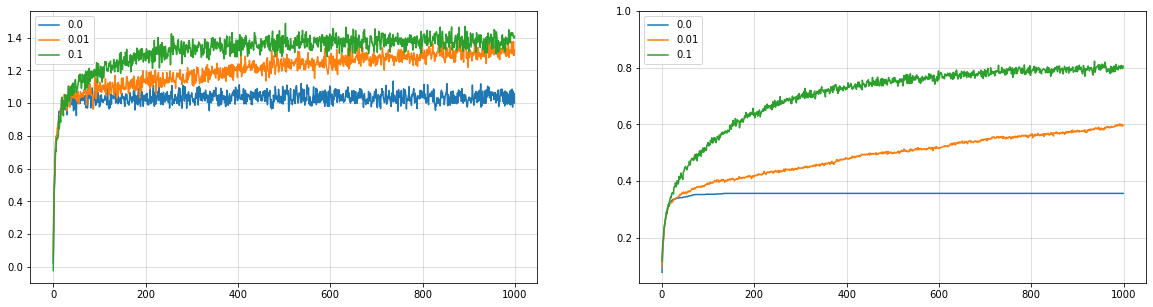

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))

rewards_df = pd.DataFrame(eps_rewards, columns=epsilons)
rewards_df.plot(ax=ax1)

opt_actions_df = pd.DataFrame(eps_optimal_actions, columns=epsilons)
opt_actions_df.plot(ax=ax2)
ax2.set_ylim(ymax=1)

for ax in (ax1, ax2):
    ax.grid(alpha=0.5)

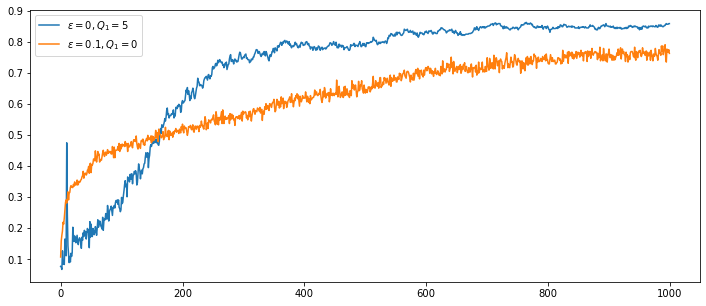

In [29]:
n_actions = 10
n_steps = 1000
n_runs = 500

fig, ax = plt.subplots(figsize=(12,5))

optimal_actions = np.zeros((n_steps, n_runs))

for j in range(n_runs):
    task = Task(n_actions, n_steps, reward_estimates_init=np.ones(n_actions)*5, epsilon=0., step_size=0.1)
    task.run_task()
    optimal_actions[:, j] = task.optimal_action_tracker
    
ax.plot(optimal_actions.mean(axis=1), label='$ε = 0, Q_1=5$')

optimal_actions = np.zeros((n_steps, n_runs))

for j in range(n_runs):
    task = Task(n_actions, n_steps, reward_estimates_init=np.zeros(n_actions), epsilon=0.1, step_size=0.1)
    task.run_task()
    optimal_actions[:, j] = task.optimal_action_tracker

ax.plot(optimal_actions.mean(axis=1), label='$ε = 0.1, Q_1=0$')
ax.legend()